In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

Dataset information

In [3]:
data = pd.read_csv(r"C:\Users\shakt\stars_classification\Stars_classification_with_HR_diagram\Dataset\Stars.csv")

In [4]:
data.shape

(240, 7)

In [5]:
data.describe

<bound method NDFrame.describe of      Temperature              L          R    A_M  Color Spectral_Class  Type
0           3068       0.002400     0.1700  16.12    Red              M     0
1           3042       0.000500     0.1542  16.60    Red              M     0
2           2600       0.000300     0.1020  18.70    Red              M     0
3           2800       0.000200     0.1600  16.65    Red              M     0
4           1939       0.000138     0.1030  20.06    Red              M     0
..           ...            ...        ...    ...    ...            ...   ...
235        38940  374830.000000  1356.0000  -9.93   Blue              O     5
236        30839  834042.000000  1194.0000 -10.63   Blue              O     5
237         8829  537493.000000  1423.0000 -10.73  White              A     5
238         9235  404940.000000  1112.0000 -11.23  White              A     5
239        37882  294903.000000  1783.0000  -7.80   Blue              O     5

[240 rows x 7 columns]>

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    object 
 6   Type            240 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 13.3+ KB


In [7]:
data.columns

Index(['Temperature', 'L', 'R', 'A_M', 'Color', 'Spectral_Class', 'Type'], dtype='object')

In [8]:
data.head(10)

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0
5,2840,0.000650,0.1100,16.98,Red,M,0
6,2637,0.000730,0.1270,17.22,Red,M,0
7,2600,0.000400,0.0960,17.40,Red,M,0
8,2650,0.000690,0.1100,17.45,Red,M,0
9,2700,0.000180,0.1300,16.05,Red,M,0


In [9]:
null_count = data.isnull().sum()
print(null_count)

Temperature       0
L                 0
R                 0
A_M               0
Color             0
Spectral_Class    0
Type              0
dtype: int64


In [15]:
stellar_types = {
    0: 'Brown Dwarf',
    1: 'Red Dwarf', 
    2: 'White Dwarf',
    3: 'Main Sequence',
    4: 'Supergiant',
    5: 'Hypergiant'
}


In [17]:
data['star_types'] = data['Type'].map(stellar_types)
data.star_types

0      Brown Dwarf
1      Brown Dwarf
2      Brown Dwarf
3      Brown Dwarf
4      Brown Dwarf
          ...     
235     Hypergiant
236     Hypergiant
237     Hypergiant
238     Hypergiant
239     Hypergiant
Name: star_types, Length: 240, dtype: object

Color palette for plot

In [35]:
sns.color_palette('pastel', 10)

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

In [32]:
sns.color_palette('rocket' , 10)

[(0.13501631, 0.07585609, 0.19044109),
 (0.26930915, 0.1091727, 0.2772502),
 (0.41282936, 0.12164769, 0.33467689),
 (0.57077365, 0.11135597, 0.35827146),
 (0.72398193, 0.08688725, 0.33943958),
 (0.85281737, 0.15657772, 0.27909826),
 (0.93078135, 0.31373977, 0.24468803),
 (0.95626788, 0.49187351, 0.33985601),
 (0.96388426, 0.64484214, 0.4861196),
 (0.96810471, 0.78634563, 0.66773889)]

In [33]:
sns.color_palette('mako', 10)

[(0.13701138, 0.08259683, 0.15060265),
 (0.20976258, 0.14925954, 0.29687795),
 (0.25007383, 0.22365053, 0.45519562),
 (0.23807973, 0.32226344, 0.58941872),
 (0.21112526, 0.42903064, 0.6266318),
 (0.20418396, 0.53013715, 0.64946117),
 (0.20968223, 0.63088252, 0.6701105),
 (0.26604085, 0.73564353, 0.67914062),
 (0.4285828, 0.82635051, 0.6780564),
 (0.68051833, 0.88963189, 0.75150483)]

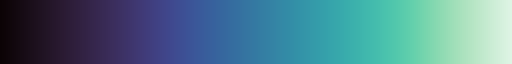

In [27]:
sns.color_palette("mako", as_cmap=True)

Visualization 

In [37]:
sns.set_palette("mako")
plt.style.use('default')

In [38]:
fig = plt.figure(figsize=(20,24))

<Figure size 2000x2400 with 0 Axes>

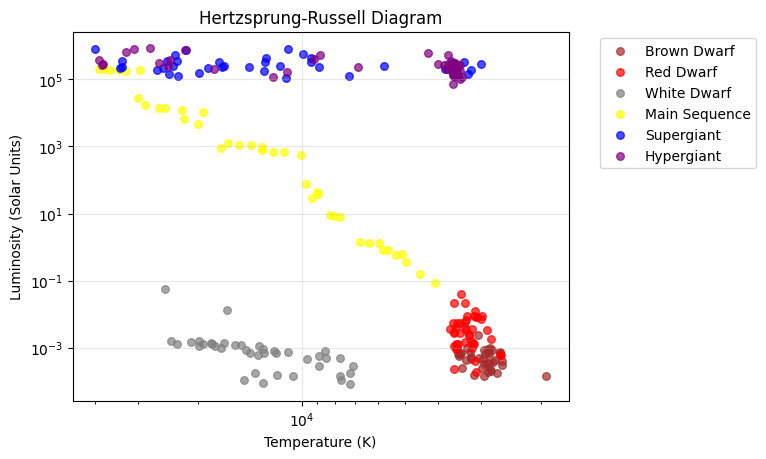

In [47]:
colors = ['brown', 'red', 'gray', 'yellow', 'blue', 'purple']
for i, (type_num, type_name) in enumerate(stellar_types.items()):
    subset = data[data['Type'] == type_num]
    plt.scatter(subset['Temperature'], subset['L'], 
                c=colors[i], label=type_name, alpha=0.7, s=30)

plt.xlabel('Temperature (K)')
plt.ylabel('Luminosity (Solar Units)')
plt.title('Hertzsprung-Russell Diagram')
plt.yscale('log')
plt.xscale('log')
plt.gca().invert_xaxis()  
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)

Text(0.5, 1.0, 'Distribution of Stellar Types')

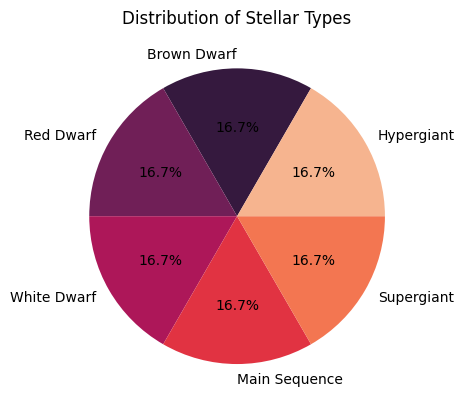

In [54]:
type_counts = data['star_types'].value_counts()
plt.pie(type_counts.values, labels=type_counts.index, autopct='%1.1f%%', startangle=60, colors=sns.color_palette('rocket', len(stellar_types)))
plt.title('Distribution of Stellar Types')

Text(0.5, 0.98, '')

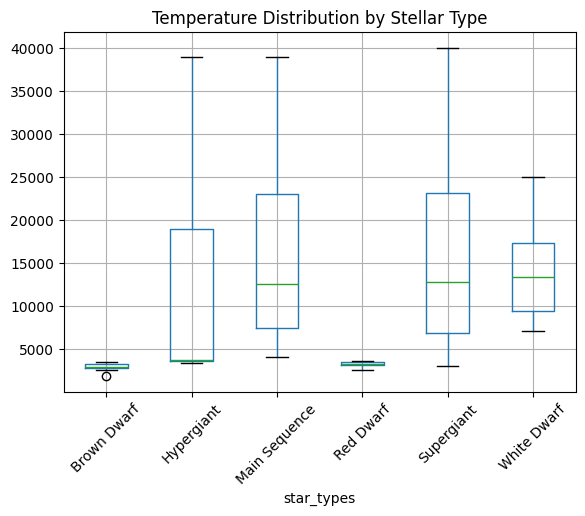

In [56]:
data.boxplot(column='Temperature', by='star_types', ax=plt.gca())
plt.xticks(rotation=45)
plt.title('Temperature Distribution by Stellar Type')
plt.suptitle('')

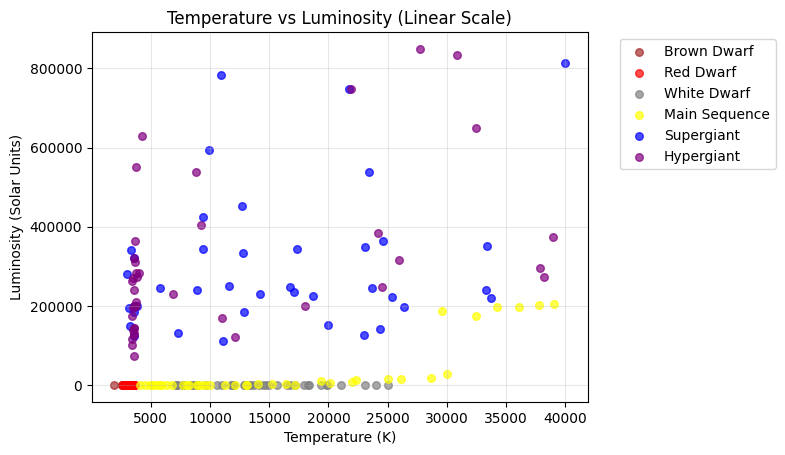

In [57]:
for i, (type_num, type_name) in enumerate(stellar_types.items()):
    subset = data[data['Type'] == type_num]
    plt.scatter(subset['Temperature'], subset['L'], 
                c=colors[i], label=type_name, alpha=0.7, s=30)
plt.xlabel('Temperature (K)')
plt.ylabel('Luminosity (Solar Units)')
plt.title('Temperature vs Luminosity (Linear Scale)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)

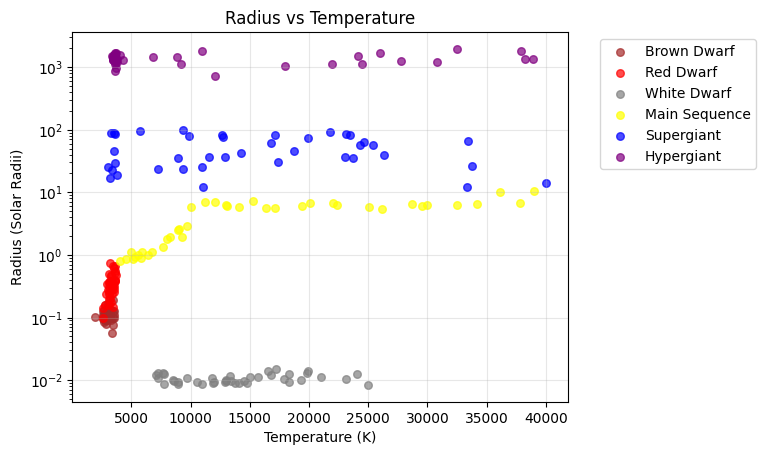

In [58]:
for i, (type_num, type_name) in enumerate(stellar_types.items()):
    subset = data[data['Type'] == type_num]
    plt.scatter(subset['Temperature'], subset['R'], 
                c=colors[i], label=type_name, alpha=0.7, s=30)
plt.xlabel('Temperature (K)')
plt.ylabel('Radius (Solar Radii)')
plt.title('Radius vs Temperature')
plt.yscale('log')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)

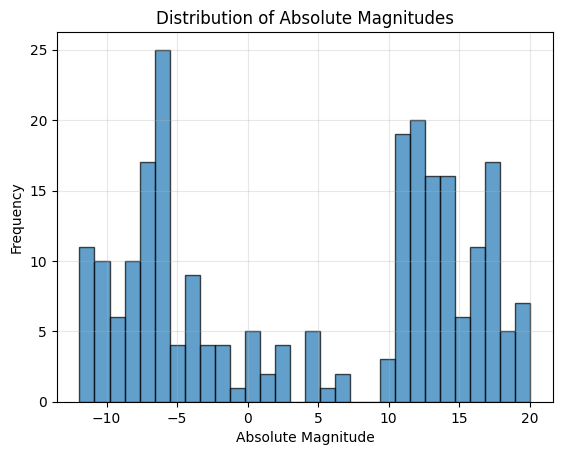

In [59]:
plt.hist(data['A_M'], bins=30, alpha=0.7, edgecolor='black')
plt.xlabel('Absolute Magnitude')
plt.ylabel('Frequency')
plt.title('Distribution of Absolute Magnitudes')
plt.grid(True, alpha=0.3)


Radius = A_M ^ 1/3
so, 
A_M = Radius ^ 3

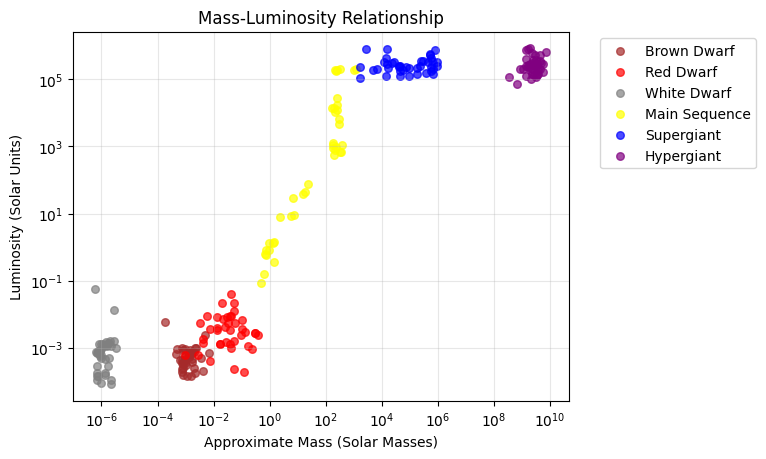

In [60]:
data['Approx_Mass'] = data['R'] ** 3
for i, (type_num, type_name) in enumerate(stellar_types.items()):
    subset = data[data['Type'] == type_num]
    plt.scatter(subset['Approx_Mass'], subset['L'], 
                c=colors[i], label=type_name, alpha=0.7, s=30)
plt.xlabel('Approximate Mass (Solar Masses)')
plt.ylabel('Luminosity (Solar Units)')
plt.title('Mass-Luminosity Relationship')
plt.xscale('log')
plt.yscale('log')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)

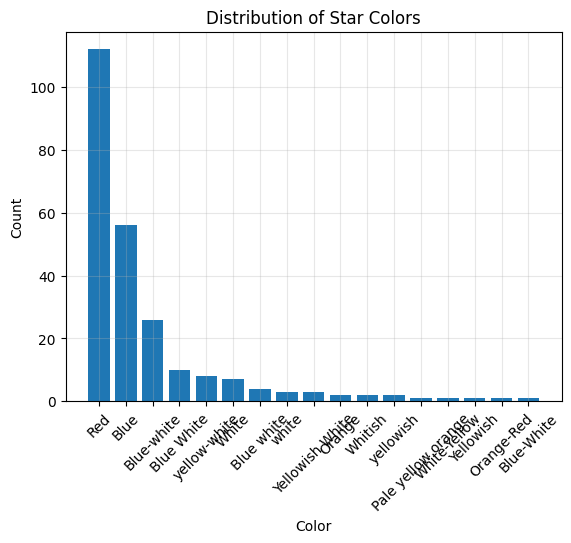

In [61]:
color_counts = data['Color'].value_counts()
plt.bar(range(len(color_counts)), color_counts.values)
plt.xticks(range(len(color_counts)), color_counts.index, rotation=45)
plt.xlabel('Color')
plt.ylabel('Count')
plt.title('Distribution of Star Colors')
plt.grid(True, alpha=0.3)

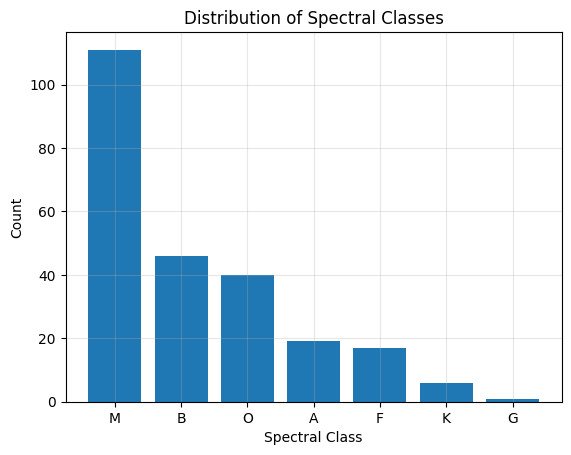

In [62]:
spectral_counts = data['Spectral_Class'].value_counts()
plt.bar(spectral_counts.index, spectral_counts.values)
plt.xlabel('Spectral Class')
plt.ylabel('Count')
plt.title('Distribution of Spectral Classes')
plt.grid(True, alpha=0.3)

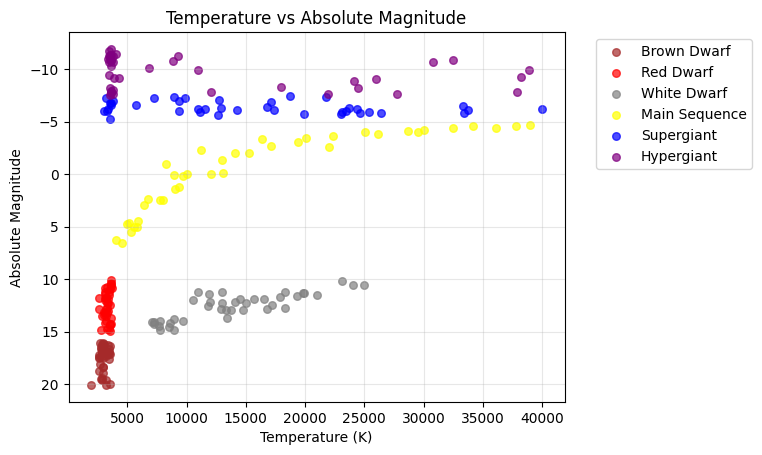

In [63]:
for i, (type_num, type_name) in enumerate(stellar_types.items()):
    subset = data[data['Type'] == type_num]
    plt.scatter(subset['Temperature'], subset['A_M'], 
                c=colors[i], label=type_name, alpha=0.7, s=30)
plt.xlabel('Temperature (K)')
plt.ylabel('Absolute Magnitude')
plt.title('Temperature vs Absolute Magnitude')
plt.gca().invert_yaxis()  # Brighter stars have lower magnitude
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)

Text(0.5, 0.98, '')

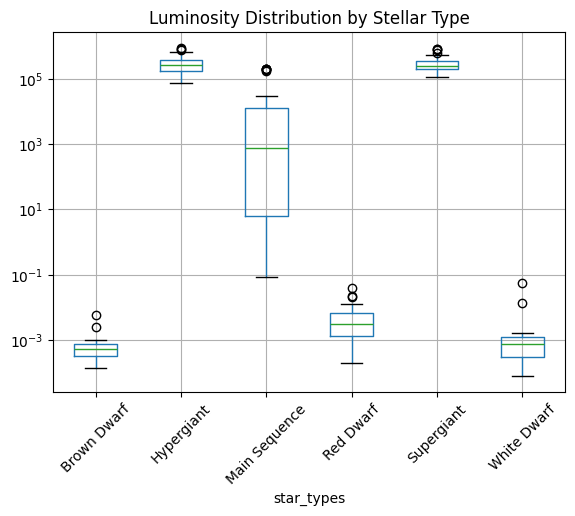

In [64]:
data.boxplot(column='L', by='star_types', ax=plt.gca())
plt.yscale('log')
plt.xticks(rotation=45)
plt.title('Luminosity Distribution by Stellar Type')
plt.suptitle('')

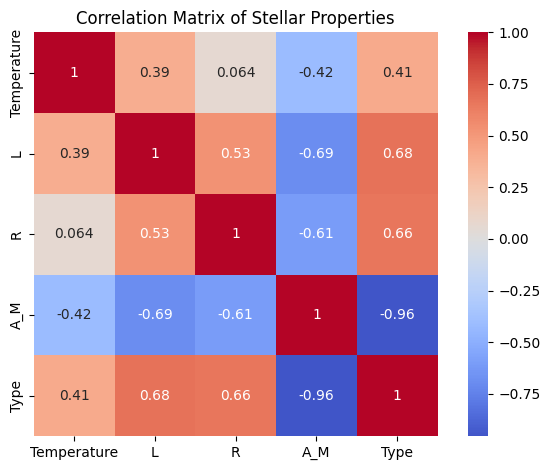

In [65]:
numeric_cols = ['Temperature', 'L', 'R', 'A_M', 'Type']
correlation_matrix = data[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, ax=plt.gca())
plt.title('Correlation Matrix of Stellar Properties')

plt.tight_layout()
plt.show()

In [66]:
print("\n1. STATISTICS BY STELLAR TYPE:")
for type_num, type_name in stellar_types.items():
    subset = data[data['Type'] == type_num]
    print(f"\n{type_name} ({len(subset)} stars):")
    print(f"  Temperature: {subset['Temperature'].mean():.0f}K ± {subset['Temperature'].std():.0f}K")
    print(f"  Luminosity: {subset['L'].mean():.2e} ± {subset['L'].std():.2e} solar units")
    print(f"  Radius: {subset['R'].mean():.2f} ± {subset['R'].std():.2f} solar radii")
    print(f"  Abs. Magnitude: {subset['A_M'].mean():.2f} ± {subset['A_M'].std():.2f}")


1. STATISTICS BY STELLAR TYPE:

Brown Dwarf (40 stars):
  Temperature: 2998K ± 332K
  Luminosity: 6.93e-04 ± 8.88e-04 solar units
  Radius: 0.11 ± 0.03 solar radii
  Abs. Magnitude: 17.56 ± 1.21

Red Dwarf (40 stars):
  Temperature: 3284K ± 270K
  Luminosity: 5.41e-03 ± 7.33e-03 solar units
  Radius: 0.35 ± 0.15 solar radii
  Abs. Magnitude: 12.54 ± 1.42

White Dwarf (40 stars):
  Temperature: 13931K ± 4958K
  Luminosity: 2.43e-03 ± 8.91e-03 solar units
  Radius: 0.01 ± 0.00 solar radii
  Abs. Magnitude: 12.58 ± 1.28

Main Sequence (40 stars):
  Temperature: 16018K ± 10661K
  Luminosity: 3.21e+04 ± 6.94e+04 solar units
  Radius: 4.43 ± 2.80 solar radii
  Abs. Magnitude: -0.37 ± 3.61

Supergiant (40 stars):
  Temperature: 15348K ± 10087K
  Luminosity: 3.02e+05 ± 1.76e+05 solar units
  Radius: 51.15 ± 27.66 solar radii
  Abs. Magnitude: -6.37 ± 0.56

Hypergiant (40 stars):
  Temperature: 11406K ± 11817K
  Luminosity: 3.09e+05 ± 1.99e+05 solar units
  Radius: 1366.90 ± 255.56 solar radii

In [68]:
print("\n Extreme values:")
print(f"Hottest star: {data.loc[data['Temperature'].idxmax(), 'Temperature']}K ({data.loc[data['Temperature'].idxmax(), 'star_types']})")
print(f"Coolest star: {data.loc[data['Temperature'].idxmin(), 'Temperature']}K ({data.loc[data['Temperature'].idxmin(), 'star_types']})")
print(f"Most luminous: {data.loc[data['L'].idxmax(), 'L']:.2e} solar units ({data.loc[data['L'].idxmax(), 'star_types']})")
print(f"Least luminous: {data.loc[data['L'].idxmin(), 'L']:.2e} solar units ({data.loc[data['L'].idxmin(), 'star_types']})")
print(f"Largest radius: {data.loc[data['R'].idxmax(), 'R']:.1f} solar radii ({data.loc[data['R'].idxmax(), 'star_types']})")
print(f"Smallest radius: {data.loc[data['R'].idxmin(), 'R']:.4f} solar radii ({data.loc[data['R'].idxmin(), 'star_types']})")


 Extreme values:
Hottest star: 40000K (Supergiant)
Coolest star: 1939K (Brown Dwarf)
Most luminous: 8.49e+05 solar units (Hypergiant)
Least luminous: 8.00e-05 solar units (White Dwarf)
Largest radius: 1948.5 solar radii (Hypergiant)
Smallest radius: 0.0084 solar radii (White Dwarf)


In [70]:
insights = [
    f"Dataset contains {len(data)} stars across 6 stellar evolutionary stages",
    f"Temperature range spans {data['Temperature'].min():,}K to {data['Temperature'].max():,}K",
    f"Luminosity varies by {data['L'].max()/data['L'].min():.1e} orders of magnitude",
    f"Most common stellar type: {data['star_types'].value_counts().index[0]} ({data['star_types'].value_counts().iloc[0]} stars)",
    f"Strong inverse correlation between temperature and absolute magnitude (r={data['Temperature'].corr(data['A_M']):.3f})",
    f"Main sequence stars follow clear temperature-luminosity relationship",
    f"Supergiants and hypergiants show extreme luminosities despite moderate temperatures",
    f"White dwarfs are hot but very small and dim",
    f"Red and brown dwarfs dominate the cooler, lower-luminosity region"
]

for i, insight in enumerate(insights, 1):
    print(f"{i:2d}. {insight}")

 1. Dataset contains 240 stars across 6 stellar evolutionary stages
 2. Temperature range spans 1,939K to 40,000K
 3. Luminosity varies by 1.1e+10 orders of magnitude
 4. Most common stellar type: Brown Dwarf (40 stars)
 5. Strong inverse correlation between temperature and absolute magnitude (r=-0.420)
 6. Main sequence stars follow clear temperature-luminosity relationship
 7. Supergiants and hypergiants show extreme luminosities despite moderate temperatures
 8. White dwarfs are hot but very small and dim
 9. Red and brown dwarfs dominate the cooler, lower-luminosity region
